<a href="https://colab.research.google.com/github/domdelvecchio/machine-learning-101/blob/main/binary%20classification/cancer/breast-cancer-prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Breast Cancer Prediction
### Steps to build an Artificial Neural Network



1.   Load and analyse dataset
2.   Cleanse dataset (drop useless columns, deal with missing data, encode columns, etc.)
3. Prepare data for the run (e.g. split 70/30 for training and test)
4. Build the traing the model
5. Verify model accuracy on test data



[Breast Cancer Dataset](https://www.kaggle.com/datasets/yasserh/breast-cancer-dataset) with description

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.metrics import classification_report,confusion_matrix


In [2]:
url = 'https://raw.githubusercontent.com/domdelvecchio/machine-learning-101/main/binary%20classification/cancer/data.csv'
df = pd.read_csv(url)

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


### Exploratory Data Analysis

In [4]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [5]:
### Remove id and Unnamed: 32

df.drop(["Unnamed: 32","id"],axis=1,inplace=True)

In [6]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [9]:
df.isnull().sum() ### No Null Values in the dataset

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

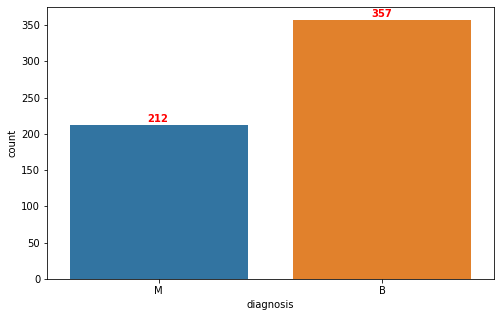

In [10]:
plt.figure(figsize=(8,5))
ax = sns.countplot(x='diagnosis',data=df)
for p in ax.patches:
    ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.35, p.get_height()+5),fontweight='bold',color='red')

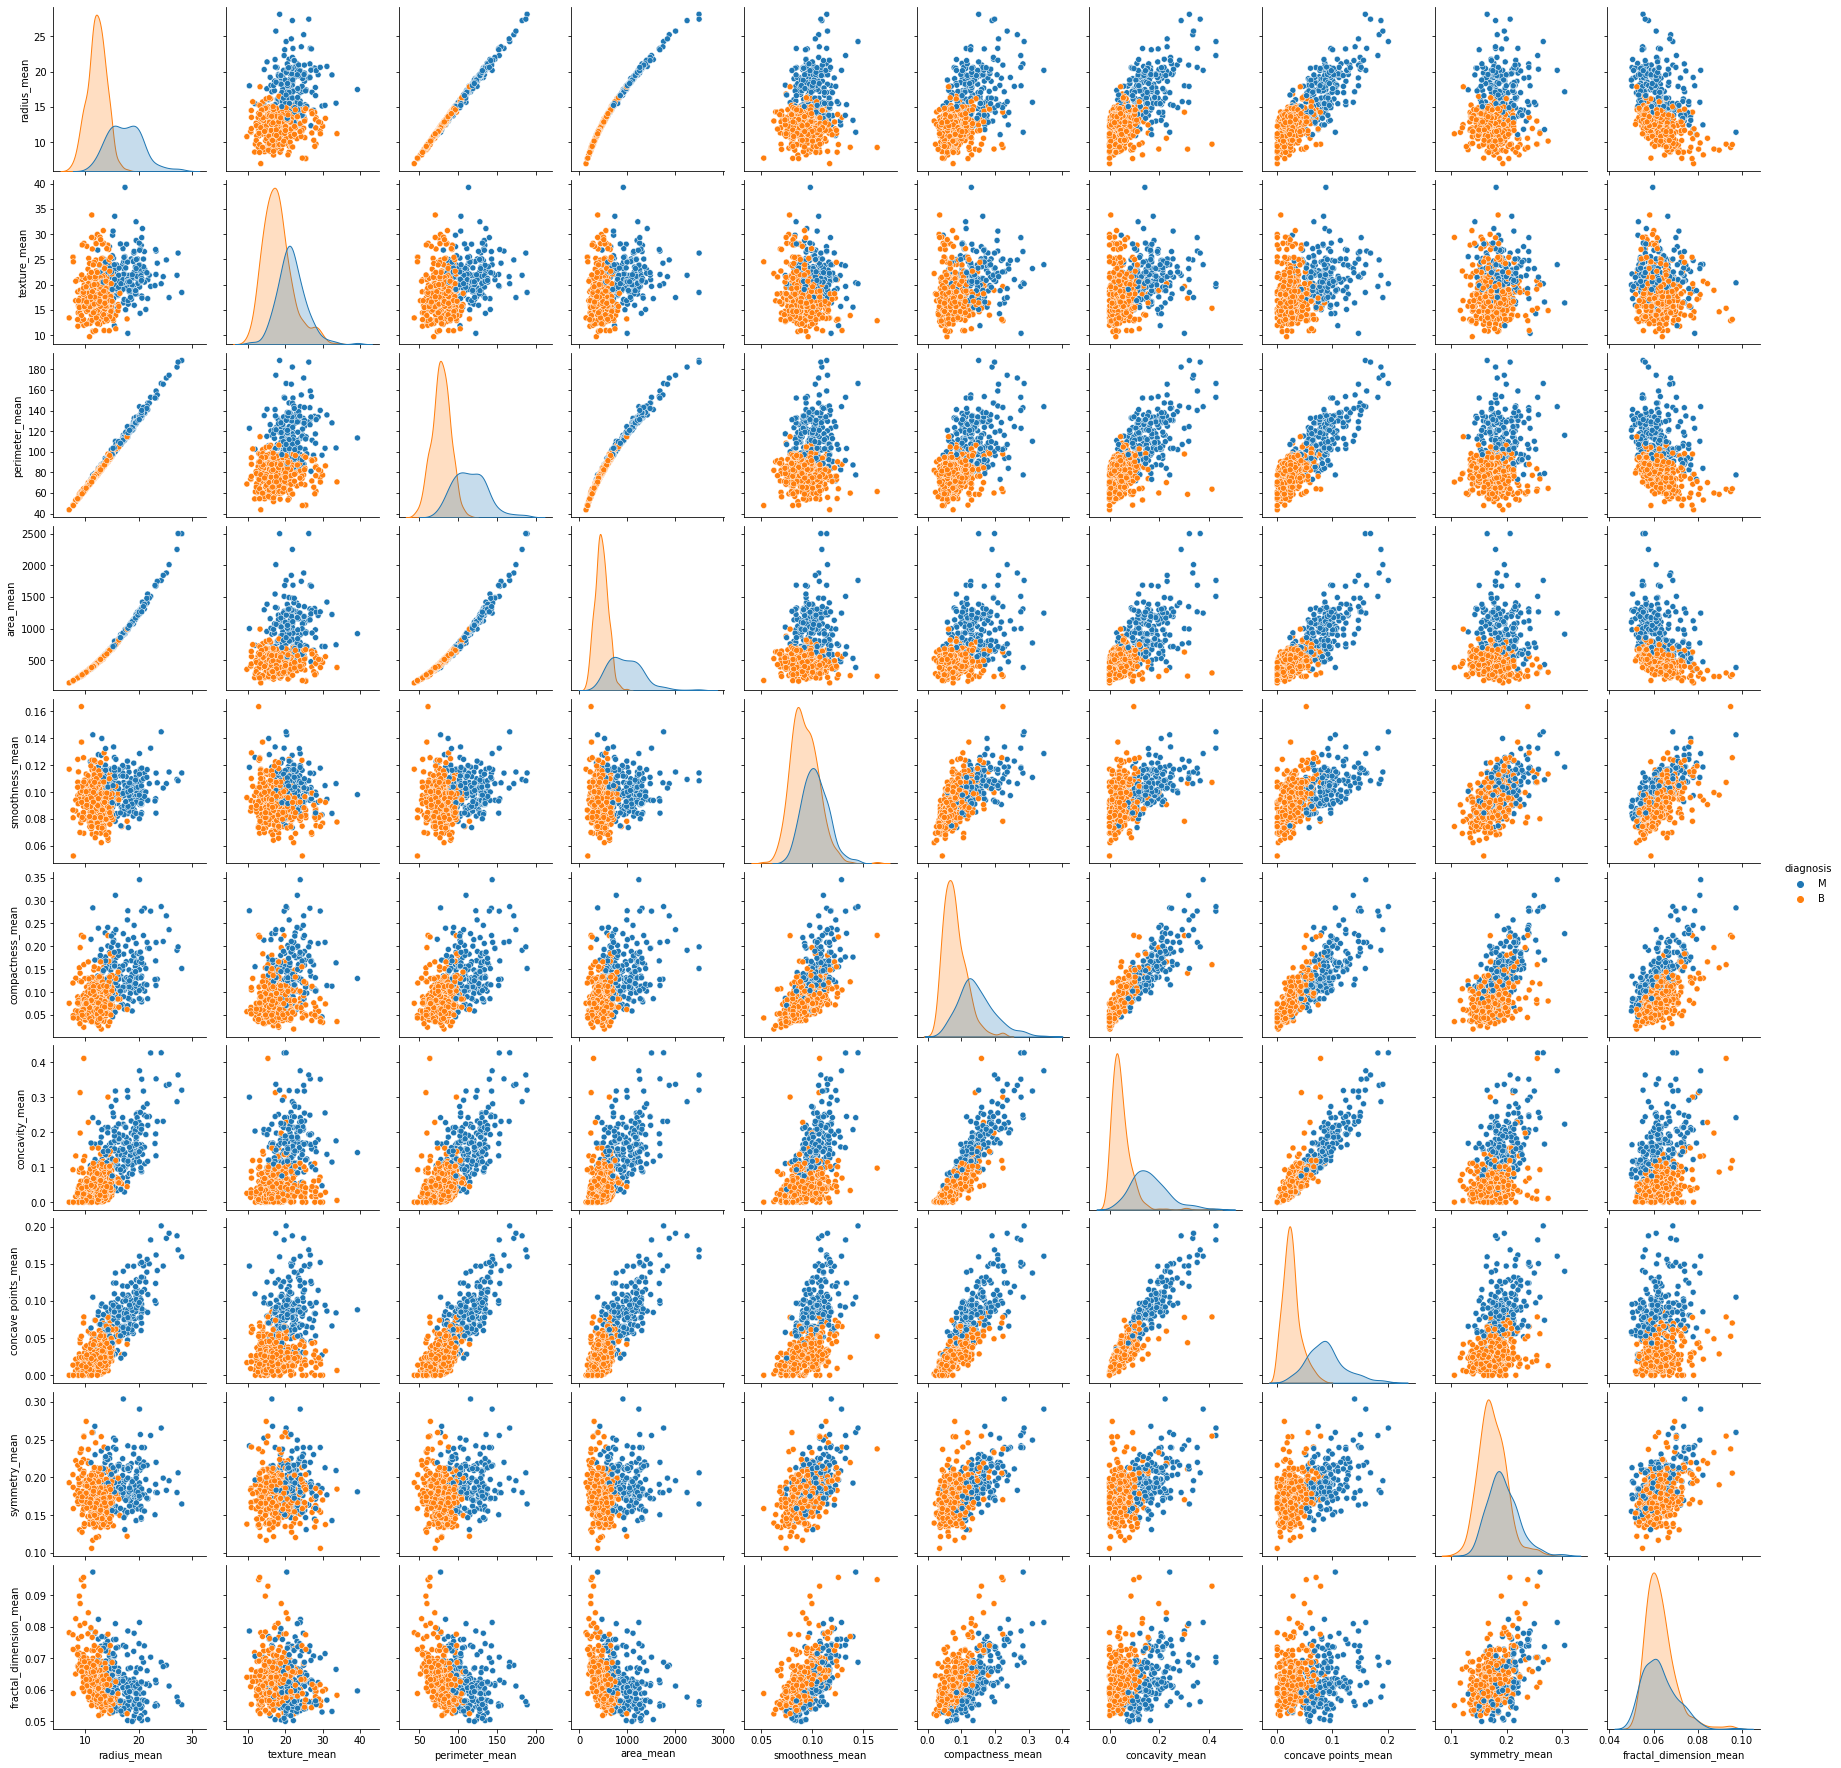

In [11]:
sns.pairplot(df.loc[:,'diagnosis':'fractal_dimension_mean'],hue='diagnosis')

### Correlation Matrix

In [12]:
label_encoder = LabelEncoder()

In [13]:
df["diagnosis"] = label_encoder.fit_transform(df["diagnosis"])

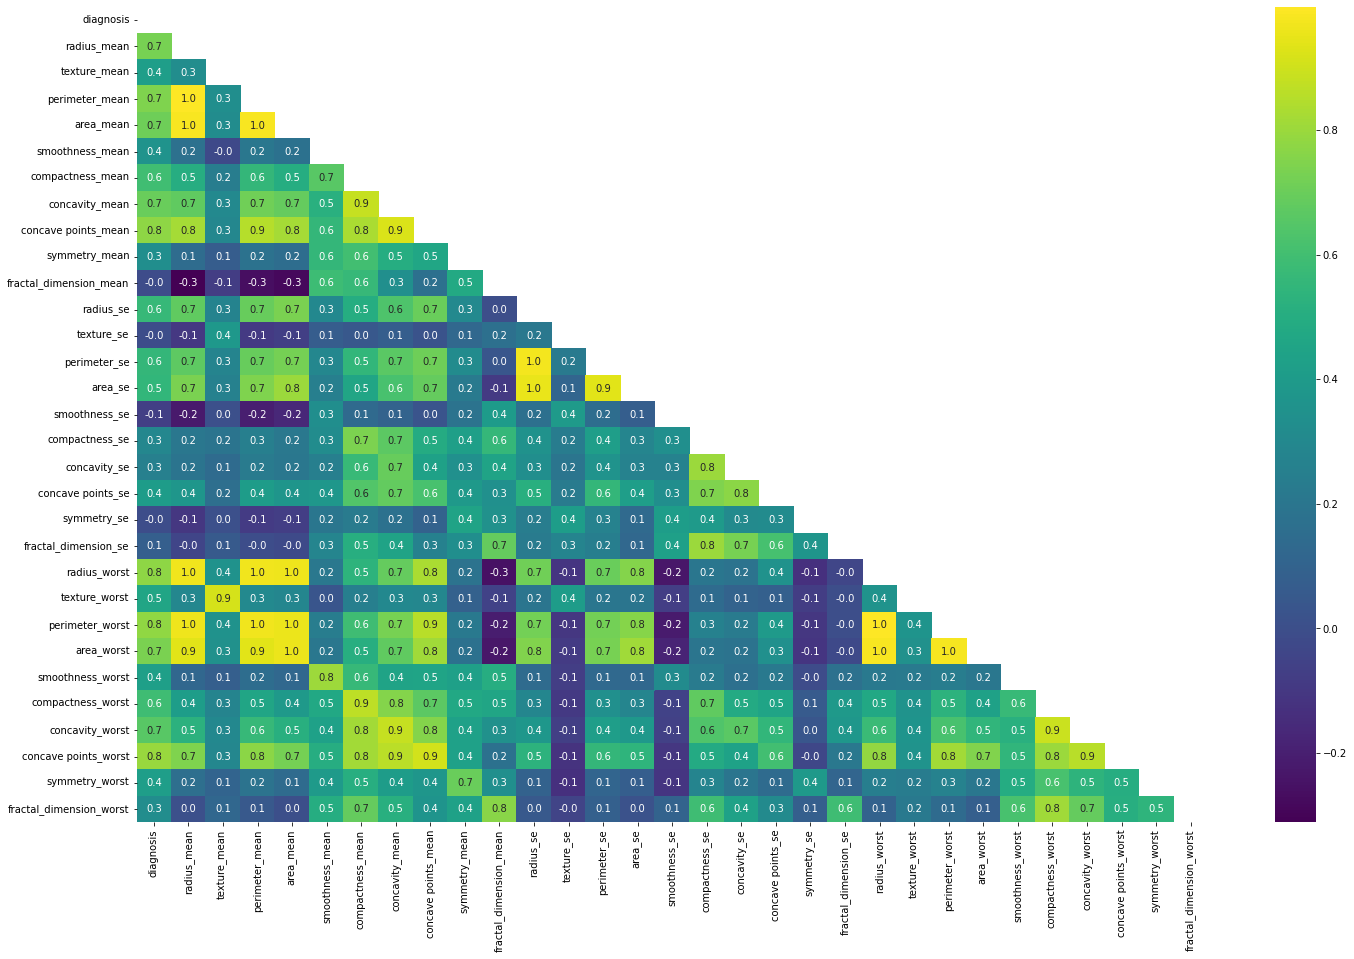

In [14]:
plt.figure(figsize=(24,15))
sns.heatmap(df.corr(),mask=np.triu(df.corr()),annot=True,fmt='.1f',cmap='viridis')

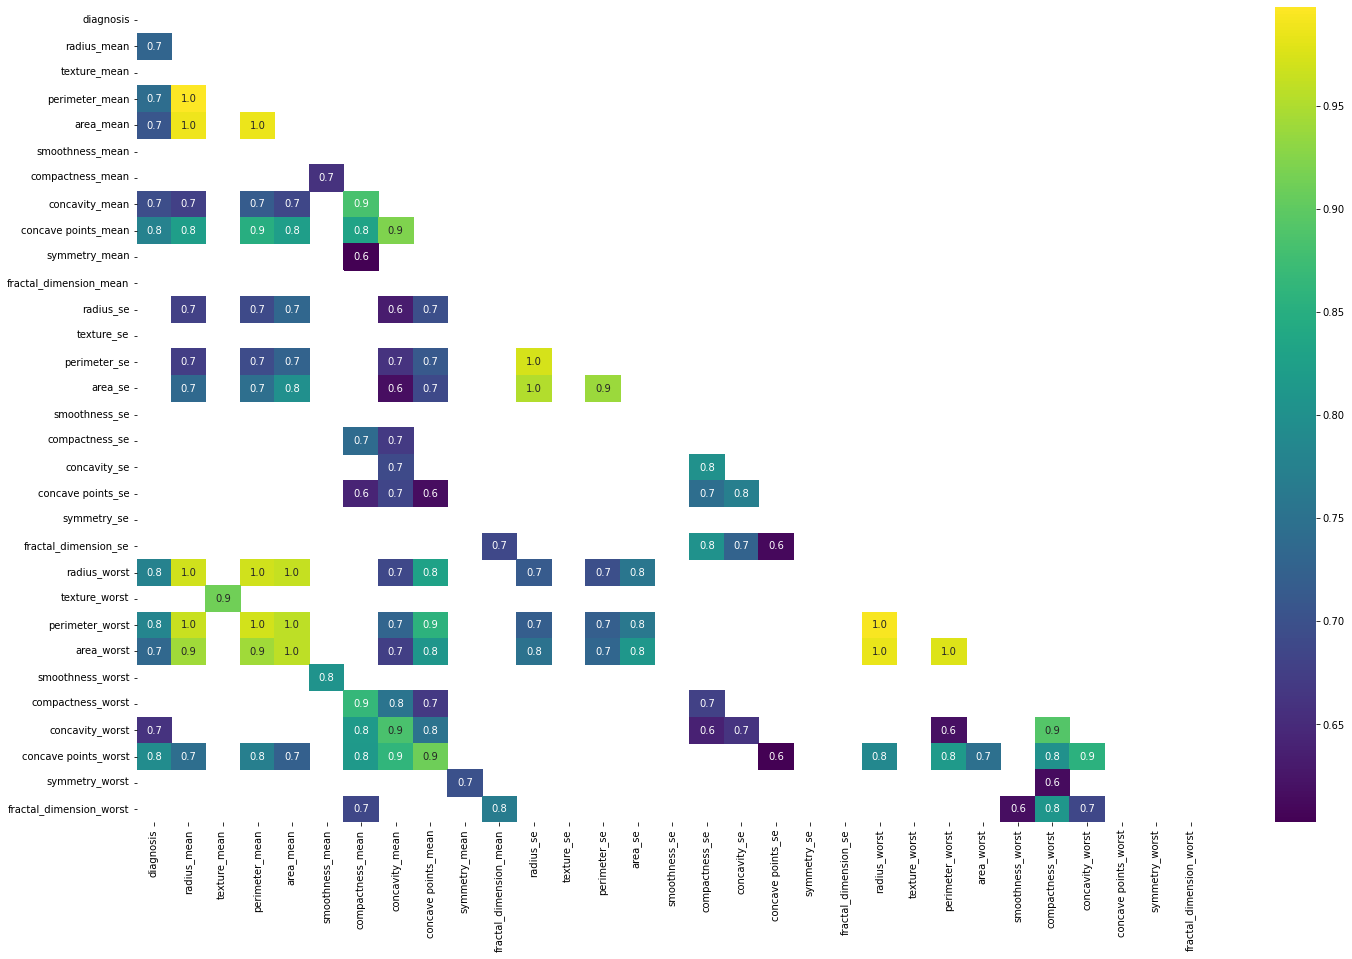

In [15]:
corr = df.corr()
corr_mat = corr[((corr > 0.6) | (corr < -0.6))]
plt.figure(figsize=(24,15))
sns.heatmap(corr_mat,mask=np.triu(corr_mat),annot=True,fmt='.1f',cmap='viridis')

Text(0.5, 1.0, 'Overall Correlation of features with Diagnosis')

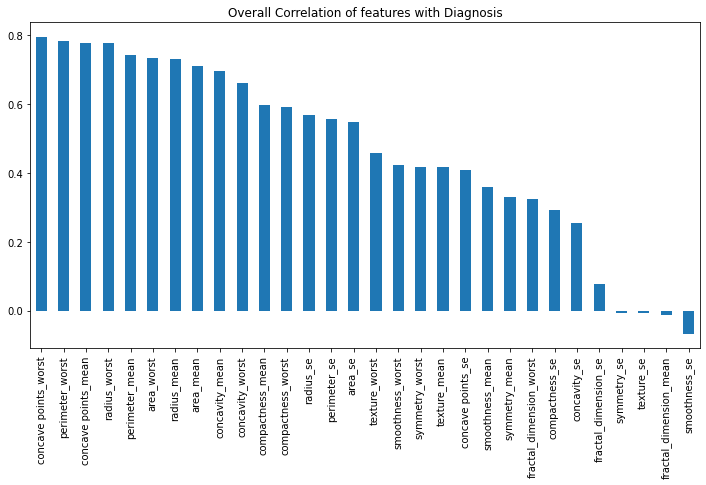

In [16]:
df.corr()["diagnosis"].sort_values(ascending=False).drop("diagnosis").plot(kind='bar',figsize=(12,6))
plt.title("Overall Correlation of features with Diagnosis")

### Data Preprocessing

In [17]:
X = df.drop('diagnosis',axis=1).values
y = df["diagnosis"].values

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [19]:
scaler = MinMaxScaler()

In [20]:
X_train = scaler.fit_transform(X_train)

In [21]:
X_test = scaler.transform(X_test)

### Model Creation

In [22]:
X_train.shape

(398, 30)

In [23]:
model = Sequential()


model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))

##Binary Classification
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy')


In [24]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=600)

Epoch 1/600
13/13 [==============================] - 1s 17ms/step - loss: 0.6738 - val_loss: 0.6537
Epoch 2/600
13/13 [==============================] - 0s 5ms/step - loss: 0.6448 - val_loss: 0.6197
Epoch 3/600
13/13 [==============================] - 0s 5ms/step - loss: 0.6109 - val_loss: 0.5774
Epoch 4/600
13/13 [==============================] - 0s 5ms/step - loss: 0.5692 - val_loss: 0.5265
Epoch 5/600
13/13 [==============================] - 0s 5ms/step - loss: 0.5176 - val_loss: 0.4682
Epoch 6/600
13/13 [==============================] - 0s 3ms/step - loss: 0.4638 - val_loss: 0.4115
Epoch 7/600
13/13 [==============================] - 0s 5ms/step - loss: 0.4129 - val_loss: 0.3614
Epoch 8/600
13/13 [==============================] - 0s 4ms/step - loss: 0.3690 - val_loss: 0.3192
Epoch 9/600
13/13 [==============================] - 0s 4ms/step - loss: 0.3288 - val_loss: 0.2839
Epoch 10/600
13/13 [==============================] - 0s 5ms/step - loss: 0.2988 - val_loss: 0.2526
Epoch 11

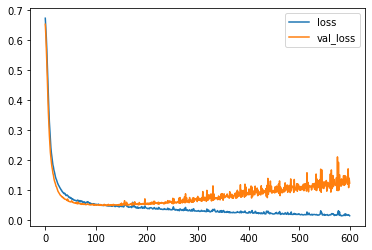

In [25]:
loss = pd.DataFrame(model.history.history)
loss.plot()

### Model seems to overfit the data, so to prevent this we can retrain the model using Earlystop and Dropout layers

In [26]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [27]:
model = Sequential()


model.add(Dense(30,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(15,activation='relu'))
model.add(Dropout(0.5))

##Binary Classification
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy')


In [28]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=600,callbacks=[early_stop])

Epoch 1/600
13/13 [==============================] - 1s 15ms/step - loss: 0.7731 - val_loss: 0.7321
Epoch 2/600
13/13 [==============================] - 0s 5ms/step - loss: 0.7022 - val_loss: 0.7061
Epoch 3/600
13/13 [==============================] - 0s 5ms/step - loss: 0.6928 - val_loss: 0.6820
Epoch 4/600
13/13 [==============================] - 0s 4ms/step - loss: 0.7094 - val_loss: 0.6607
Epoch 5/600
13/13 [==============================] - 0s 5ms/step - loss: 0.6728 - val_loss: 0.6403
Epoch 6/600
13/13 [==============================] - 0s 5ms/step - loss: 0.6608 - val_loss: 0.6197
Epoch 7/600
13/13 [==============================] - 0s 5ms/step - loss: 0.6428 - val_loss: 0.6011
Epoch 8/600
13/13 [==============================] - 0s 5ms/step - loss: 0.6237 - val_loss: 0.5809
Epoch 9/600
13/13 [==============================] - 0s 4ms/step - loss: 0.5964 - val_loss: 0.5565
Epoch 10/600
13/13 [==============================] - 0s 4ms/step - loss: 0.5711 - val_loss: 0.5280
Epoch 11

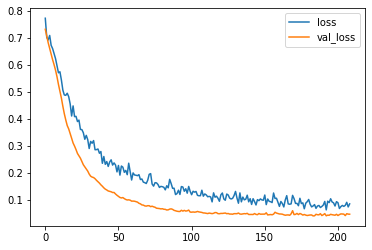

In [29]:
loss_df_drop = pd.DataFrame(model.history.history)
loss_df_drop.plot()

In [30]:
#predictions = model.predict_classes(X_test)
predictions = (model.predict(X_test) > 0.5).astype("int32")


In [31]:
print(classification_report(y_true=y_test,y_pred=predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       108
           1       0.98      0.98      0.98        63

    accuracy                           0.99       171
   macro avg       0.99      0.99      0.99       171
weighted avg       0.99      0.99      0.99       171



In [32]:
print(confusion_matrix(y_test,predictions))

[[107   1]
 [  1  62]]


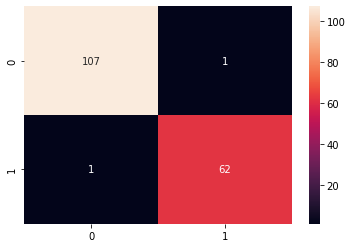

In [33]:
sns.heatmap(confusion_matrix(y_test,predictions),annot=True,fmt='.0f')

### Conclusion: Model is very good in classifying Beningn and Malignant Classes using Dropout and Earlystopping method by preventing overfitting in Neural Networks

Run the model for a single input. It could be a new external inut but for simplicity we'll use one from the existing X.

In [42]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [91]:
x_one = scaler.transform(X[19].reshape(1, 30))
test_result = model.predict(x_one)

In [92]:
test_result

array([[0.02247745]], dtype=float32)